## **Simulation of compound interest of portfolio by consistently investing**
---
Conditions:
*   constantly monthly investment - 200$
*   constant APY - 5%
*   Period - 20 years

### 1. Libraries

In [1]:
#Import the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Create a variable for your monthly deposits
monthly_saving = 200 #monthly payment 200USD
#Create a variable to store the intrest rate
rate = 0.05 # 5% Annual Percentage Yield APY
#Create a variable to store the time or number of time periods elapsed
time = 1/12
#Create a variable to store the number of times the intrest is applied per time period
num_compounded = 12
#Create a variable to store the number of months invested
num_months_saving = 240 #12 moths * 20 years = 240

### 2. Compound formula

In [3]:
#Create a function to mimic the compound formula
# https://www.calculatorsoup.com/calculators/financial/compound-interest-calculator.php
def compound_intrest(P, r, t, n):
  #Create the formula
  #A = P(1+r/n)^(tn)
  A = P * pow( (1+r/n), (t*n) )
  return A

### 3. Main function

In [5]:
#Create a function for the strategy
def investment_strategy():
  #Create empty lists to store the values
  compound_list = []
  monthly_deposit_list = []
  compound_deposit_list = []
  compound_deposit_list.append(200)

  #Add the initial deposit or the 1st moth savings to the lists
  compound_list.append(monthly_saving)
  monthly_deposit_list.append(monthly_saving)

  #Loop through the number of months -1
  for i in range(1, num_months_saving):
    Amount = compound_intrest( compound_list[i-1], rate, time, num_compounded)
    compound_list.append( Amount + monthly_saving)
    monthly_deposit_list.append(monthly_saving)
    compound_deposit_list.append(monthly_saving + compound_deposit_list[i-1])

  return (compound_list, monthly_deposit_list, compound_deposit_list)

In [15]:
#Get and store the compound list
compound_list = investment_strategy()[0]
compound_list

[200,
 400.83333333333337,
 602.5034722222222,
 805.0139033564815,
 1008.3681279538001,
 1212.5696618202742,
 1417.622035411192,
 1623.528793892072,
 1830.2934971999555,
 2037.9197201049553,
 2246.4110522720594,
 2455.7710983231927,
 2666.003477899539,
 2877.1118257241205,
 3089.0997916646375,
 3301.9710407965736,
 3515.7292534665594,
 3730.3781253560032,
 3945.9213675449864,
 4162.362706576424,
 4379.705884520492,
 4597.954659039327,
 4817.112803451992,
 5037.184106799708,
 5258.172373911374,
 5480.081425469338,
 5702.91509807546,
 5926.677244317441,
 6151.3717328354305,
 6377.002448388911,
 6603.573291923864,
 6831.088180640214,
 7059.5510480595485,
 7288.96584409313,
 7519.336535110185,
 7750.667104006477,
 7982.96155027317,
 8216.223890065976,
 8450.458156274584,
 8685.668398592396,
 8921.85868358653,
 9159.03309476814,
 9397.195732663007,
 9636.350714882436,
 9876.502176194446,
 10117.654268595257,
 10359.81116138107,
 10602.977041220158,
 10847.156112225242,
 11092.352596026181,


In [21]:
#Get and store the total compound deposit list
compound_deposit_list = investment_strategy()[2]

In [22]:
#Show the total return after "n" years on my investment
total_return = compound_list[num_months_saving - 1]
total_return

82206.73370313575

In [23]:
#Get the list of monthly deposits
monthly_deposit_list = investment_strategy()[1]

#Get the total deposit amount
total_deposit = len(monthly_deposit_list) * monthly_saving
total_deposit

48000

### 4. Plot of relationship between return and deposit of investment

<module 'matplotlib.pyplot' from 'D:\\Programowanie\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

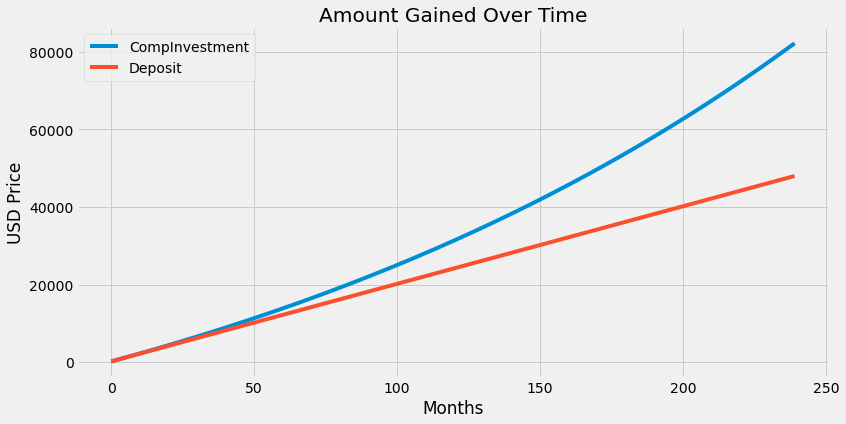

In [25]:
#Visually show the investments
plt.figure(figsize=(12, 6))
plt.plot(compound_list, label='CompInvestment')
plt.plot(compound_deposit_list, label='Deposit')
plt.title('Amount Gained Over Time')
plt.ylabel('USD Price')
plt.xlabel('Months')
plt.legend(loc='upper left')
plt